<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/Chapter10_%EC%8B%A4%EC%8A%B5_%EB%AA%A8%EB%8D%B8_%EC%84%B1%EB%8A%A5_%ED%96%A5%EC%83%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION 02. 머신러닝 모델링 및 하이퍼 파라미터 튜닝 실습하기

## 1. [회귀] 항공권 가격 예측 모델링하기

### 1) 데이터 불러오기

In [ ]:
# 판다스 라이브러리 불러오기
import pandas as pd
#cdf = pd.read_csv("Clean_Dataset.csv")
cdf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/@data_anal/Clean_Dataset.csv')

# 학습시간 단축을 위해 5000건만 추출하기
cdf = cdf[:5000]

# 데이터 확인하기
cdf.head(1)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 2) 데이터 전처리하기

#### (1) Unnamed 삭제 및 데이터 기초 통계 정보 확인하기

In [ ]:
# Unnamed: 0 데이터 분포 확인하기
cdf["Unnamed: 0"].value_counts()

0       1
3330    1
3337    1
3336    1
3335    1
       ..
1666    1
1665    1
1664    1
1663    1
4999    1
Name: Unnamed: 0, Length: 5000, dtype: int64

In [ ]:
# Unnamed 컬럼 삭제하기
cdf.drop("Unnamed: 0", axis = 1, inplace =True)

In [ ]:
 # 기초 통계정보 확인하기
cdf.describe(include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,5000,5000,5000,5000,5000,5000,5000,5000,5000.000000,5000.000000,5000.000000
unique,6,222,1,6,3,6,1,1,NaN,NaN,NaN
top,Vistara,UK-819,Delhi,Evening,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,1496,90,5000,1391,3619,1702,5000,5000,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.665682,14.216800,7589.786600
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.247512,7.109536,4476.362204
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,1.000000,2409.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.330000,8.000000,4678.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.670000,14.000000,5955.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.080000,20.000000,10549.000000


#### (2) Null 데이터 분석 및 처리하기

In [ ]:
# info를 통해 Null 데이터 및 type 확인 있는지 1차 확인하기(isna를 사용해도 됨)
print("Null 데이터 확인")
cdf.info()

Null 데이터 확인
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   airline           5000 non-null   object 
 1   flight            5000 non-null   object 
 2   source_city       5000 non-null   object 
 3   departure_time    5000 non-null   object 
 4   stops             5000 non-null   object 
 5   arrival_time      5000 non-null   object 
 6   destination_city  5000 non-null   object 
 7   class             5000 non-null   object 
 8   duration          5000 non-null   float64
 9   days_left         5000 non-null   int64  
 10  price             5000 non-null   int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 429.8+ KB


#### (3) airline 컬럼 분석 및 처리하기

In [ ]:
# 첫 번째 컬럼이 의미있는 컬럼인지 확인하기 위해 value_count로 분포 확인하기
cdf.airline.value_counts()

Vistara      1496
Air_India    1311
Indigo        813
GO_FIRST      801
SpiceJet      296
AirAsia       283
Name: airline, dtype: int64

In [ ]:
# 그래프 라이브러리 불러오기(matplotlib, seaborn)
import matplotlib.pyplot as plt
import seaborn as sns

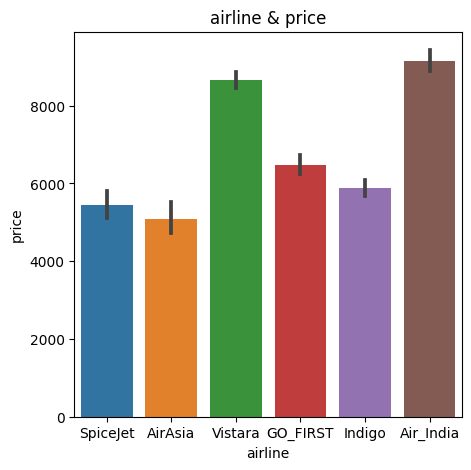

In [ ]:
# Seaborn 으로 막대그래프 그리기
# 배경 사이즈 설정하기
plt.figure(figsize=(5,5))
# 막대그래프 차트 그리기
ax = sns.barplot(x='airline', y='price', data=cdf)
# 상단 타이틀 지정하기
ax.set(title='airline & price')
# 그래프 출력하기
plt.show()

#### (4) flight 컬럼 분석 및 처리하기

In [ ]:
# 2번째 flight 값 재확인하기
cdf.head(1)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953


In [ ]:
# flight column 분포 확인하기
cdf.flight.value_counts()

UK-819     90
UK-879     62
UK-899     61
UK-705     61
UK-835     60
           ..
AI-9939     2
I5-881      2
I5-744      1
SG-9974     1
SG-8339     1
Name: flight, Length: 222, dtype: int64

In [ ]:
# flight 칼럼은 다른 칼럼과 의미가 중복되는 것으로 보이므로 삭제하기
cdf.drop('flight', axis=1, inplace=True)

In [ ]:
# 잘 삭제되었는지 shape 확인하기
cdf.shape

(5000, 10)

#### (5) 원핫 인코딩하기

In [ ]:
# one_hot 인코딩을 위해 get_dummies 처리하기
dummies_cdf = pd.get_dummies(cdf,
               columns=["airline", 'source_city','departure_time', 'stops','arrival_time', 'destination_city', 'class'],
               drop_first=True
              )

In [ ]:
# 인코딩 확인하기
print(f'''원핫인코딩 전 {cdf.shape}
원핫인코딩 후 {dummies_cdf.shape}''')

원핫인코딩 전 (5000, 10)
원핫인코딩 후 (5000, 20)


#### (6) 학습 데이터 만들기

In [ ]:
# 데이터프레임에서 타깃 변수만 y로 추출하기
y = dummies_cdf.price

# y 값의 형태 확인하기
y.head(5)

0    5953
1    5953
2    5956
3    5955
4    5955
Name: price, dtype: int64

In [ ]:
# 데이터프레임에서 타깃 변수를 제외한 입력 데이터세트를 생성하기
x = dummies_cdf.drop('price', axis=1)

x.head(5)

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,stops_two_or_more,stops_zero,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,2.17,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1
1,2.33,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0
2,2.17,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0
3,2.25,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
4,2.33,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0


In [ ]:
# shape 확인하기
x.shape, y.shape

((5000, 19), (5000,))

### 3) 모델 학습하기

#### (1) 머신러닝 라이브러리 불러오기

In [ ]:
# xgboost, lightgbm모델 설치하기
!pip install xgboost
!pip install lightgbm

In [ ]:
# scikit learn 기반 라이브러리 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

# scikit learn 외 라이브러리 불러오기
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

# 학습_검증 데이터 분리 라이브러리 불러오기
from sklearn.model_selection import train_test_split

#### (2) 머신러닝 모델 생성하기

In [ ]:
# 머신러닝 모델 생성하기
# 모델 생성 시 n_jobs 옵션이 있는 모델은 -1을 적용하여 동작 시키는 것을 권유함
lr = LinearRegression( n_jobs=-1)
dtr = DecisionTreeRegressor( random_state=1)
rfr = RandomForestRegressor( random_state=1)
gbr = GradientBoostingRegressor( random_state=1)
xgbr = XGBRFRegressor(n_jobs=-1, random_state=1)
etr = ExtraTreesRegressor(n_jobs=-1, random_state=1)
lgbmr = LGBMRegressor(n_jobs=-1, random_state=1)

In [ ]:
# 훈련 데이터 분할하기
x_train, x_test, y_train ,y_test = train_test_split(x, y ,
                   test_size=0.3,
                   random_state=2023, # 서로 다른 결과를 나타내지 않기
                )

In [ ]:
# shape 확인하기
x_test.shape, y_test.shape

((1500, 19), (1500,))

In [ ]:
# shape 확인하기
x_train.shape, y_train.shape

((3500, 19), (3500,))

#### (3) 머신러닝 모델 학습하기

In [ ]:
%%time
# 머신러닝 모델(base 모델) 학습하기

lr.fit(x_train, y_train)
dtr.fit(x_train, y_train)
rfr.fit(x_train, y_train)
gbr.fit(x_train, y_train)
xgbr.fit(x_train, y_train)
etr.fit(x_train, y_train)
lgbmr.fit(x_train, y_train)

CPU times: user 2.62 s, sys: 194 ms, total: 2.81 s
Wall time: 2.29 s


LGBMRegressor(random_state=1)

#### (4) 머신러닝 모델 성능 비교하기

In [ ]:
# 결과 검증용 라이브러리 불러오기
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
# 리스트에 모델 입력하기
models = [lr, dtr, rfr, gbr, xgbr, etr, lgbmr]

In [ ]:
r2_score_list = []
rmse_score_list = []

# 모델 결과 확인하기
for model in models:
    pred = model.predict(x_test)
    r2_score_list.append(
        round(r2_score(y_test, pred),5)
    )
    # squared를 False로 하면 RMSE가 됨
    rmse_score_list.append(
        round(mean_squared_error(
            y_test, pred, squared=False),5)
    )

r2_score_df = pd.DataFrame([r2_score_list, rmse_score_list],
                           columns=["lr", "dtr", "rfr", "gbr", "xgbr", "etr","lgbmr"],
                           index=["r2", "rmse"]
                          )

r2_score_df

,lr,dtr,rfr,gbr,xgbr,etr,lgbmr
r2,0.61523,0.70927,0.79828,0.76376,0.73047,0.74807,0.79957
rmse,2818.92861,2450.35112,2041.08811,2208.84675,2359.33551,2280.97506,2034.53417


### 4) 최적의 파라미터 찾기

In [ ]:
# GridSearchCV 라이브러리 불러오기
from sklearn.model_selection import GridSearchCV

In [ ]:
# 비교 하이퍼파라미터 선정하기
param_grid = {
    'learning_rate': [0.1 ,0.01, 0.003],
    'colsample_bytree': [0.5, 0.7],
    'max_depth' : [ 20,30,40],
}

In [ ]:
# 최적 하이퍼파라미터 검색하기
cv_lgbmr = GridSearchCV(estimator=lgbmr,
                      param_grid=param_grid,
                      cv= 5,
                      verbose=1
                     )

cv_lgbmr.fit(x_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=1),
             param_grid={'colsample_bytree': [0.5, 0.7],
                         'learning_rate': [0.1, 0.01, 0.003],
                         'max_depth': [20, 30, 40]},
             verbose=1)

In [ ]:
# 최적 하이퍼파라미터 조합 확인하기
cv_lgbmr.best_params_

{'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 30}

In [ ]:
# 최적 하이퍼파라미터 결과 확인하기
cv_lgbmr.best_score_ # 예측 정확도 확인하기

0.803203388259023

In [ ]:
# 머신러닝 모델 검증하기
# 최적의 하이퍼파라미터로 재학습하기
best_lgbmr = LGBMRegressor(max_depth= 30,
                                 colsample_bytree= 0.7,
                                 learning_rate= 0.1,
                                 n_jobs=-1,
                                 random_state= 1
                                )
best_lgbmr.fit(x_train,y_train)

LGBMRegressor(colsample_bytree=0.7, max_depth=30, random_state=1)

In [ ]:
# 모델 성능 검증하기
b_pred=best_lgbmr.predict(x_test)
print('r2 : ', round(r2_score(y_test, b_pred),5))
print('rmse : ', round(mean_squared_error(y_test, b_pred, squared=False),5))

r2 :  0.80154
rmse :  2024.49371


In [ ]:
# RandomizedSearchCV 라이브러리 호출하기
from sklearn.model_selection import RandomizedSearchCV

# 비교 파라미터 선정하기
param_dists = {
    'learning_rate': [0.1 ,0.01, 0.003],
    'colsample_bytree': [0.5, 0.7],
    'max_depth' : [ 20,30,40],
}


In [ ]:
%%time
# 최적 파라미터 검색하기
cv_lgbmr = RandomizedSearchCV(estimator=lgbmr,
                      param_distributions=param_dists,
                      n_iter = 500,
                      cv= 5,
                      verbose=1
                     )

cv_lgbmr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 18 is smaller than n_iter=500. Running 18 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 10.1 s, sys: 376 ms, total: 10.4 s
Wall time: 7.09 s


RandomizedSearchCV(cv=5, estimator=LGBMRegressor(random_state=1), n_iter=500,
                   param_distributions={'colsample_bytree': [0.5, 0.7],
                                        'learning_rate': [0.1, 0.01, 0.003],
                                        'max_depth': [20, 30, 40]},
                   verbose=1)

In [ ]:
# 최적의 파라미터 조합 확인하기
cv_lgbmr.best_params_

{'max_depth': 30, 'learning_rate': 0.1, 'colsample_bytree': 0.7}

## 2. [분류] 항공사 고객 만족 여부 예측 모델링

### 1) 데이터 불러오기

In [ ]:
# 판다스 라이브러리 불러오기
import pandas as pd

# 파일이 저장된 경로에서 데이터 로딩하기
#cdf = pd.read_csv("Invistico_Airline.csv")
cdf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/@data_anal/Invistico_Airline.csv")

# 학습시간 단축을 위해 5,000건만 추출하기
cdf = cdf[:5000]

# 중간에 Column 이 '...'으로 표시되는 것 확인하기
cdf.head(1)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0


In [ ]:
# 모든 칼럼을 표시하기
pd.set_option('display.max_columns', None)
cdf.head(1)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0


### 2) 데이터 전처리하기

#### (1) 레이블 불균형 확인하기

In [ ]:
# 타깃 변수 satisfaction 칼럼의 레이블 별 갯수를 출력하기
cdf.satisfaction.value_counts()

satisfied       2869
dissatisfied    2131
Name: satisfaction, dtype: int64

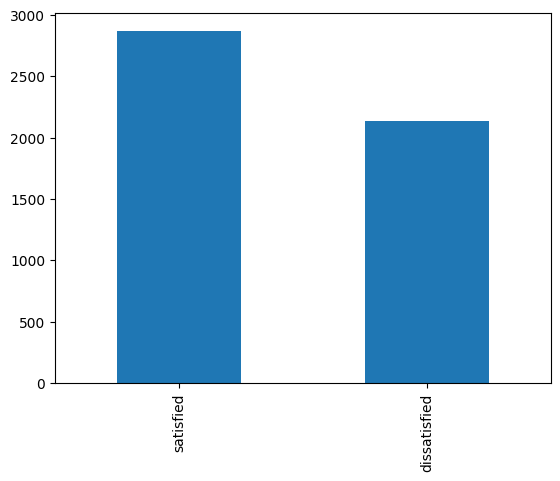

In [ ]:
# 그래프를 활용하기 위한 라이브러리 불러오기
import matplotlib.pyplot as plt

# 막대그래프로 표현하기
cdf['satisfaction'].value_counts().plot(kind='bar')
plt.show()

#### (2) null 데이터 처리하기

In [ ]:
# null 데이터 확인하기
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       5000 non-null   object 
 1   Gender                             5000 non-null   object 
 2   Customer Type                      5000 non-null   object 
 3   Age                                5000 non-null   int64  
 4   Type of Travel                     5000 non-null   object 
 5   Class                              5000 non-null   object 
 6   Flight Distance                    5000 non-null   int64  
 7   Seat comfort                       5000 non-null   int64  
 8   Departure/Arrival time convenient  5000 non-null   int64  
 9   Food and drink                     5000 non-null   int64  
 10  Gate location                      5000 non-null   int64  
 11  Inflight wifi service              5000 non-null   int64

In [ ]:
# 결측치 행 삭제하기
cdf.dropna(axis=0, inplace=True)

# 삭제 여부 확인하기
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4973 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   satisfaction                       4973 non-null   object 
 1   Gender                             4973 non-null   object 
 2   Customer Type                      4973 non-null   object 
 3   Age                                4973 non-null   int64  
 4   Type of Travel                     4973 non-null   object 
 5   Class                              4973 non-null   object 
 6   Flight Distance                    4973 non-null   int64  
 7   Seat comfort                       4973 non-null   int64  
 8   Departure/Arrival time convenient  4973 non-null   int64  
 9   Food and drink                     4973 non-null   int64  
 10  Gate location                      4973 non-null   int64  
 11  Inflight wifi service              4973 non-null   int64

#### (3) 학습 데이터 만들기

In [ ]:
# 라벨 데이터 y를 나누기

# cdf 데이터프레임에서 label만 y로 추출하기
y = cdf.satisfaction

# y 값의 형태 확인하기
y.head(5)

0    satisfied
1    satisfied
2    satisfied
3    satisfied
4    satisfied
Name: satisfaction, dtype: object

In [ ]:
# price 칼럼 삭제하고 입력 데이터 만들기
x = cdf.drop("satisfaction", axis=1 )

# 타깃 변수 데이터 만들기
y = cdf.satisfaction

# 데이터 크기 확인하기
x.shape, y.shape

((4973, 22), (4973,))

#### (4)원핫 인코딩하기

In [ ]:
# info 메소드로 데이터 유형 확인하기
x.info()
x.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4973 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             4973 non-null   object 
 1   Customer Type                      4973 non-null   object 
 2   Age                                4973 non-null   int64  
 3   Type of Travel                     4973 non-null   object 
 4   Class                              4973 non-null   object 
 5   Flight Distance                    4973 non-null   int64  
 6   Seat comfort                       4973 non-null   int64  
 7   Departure/Arrival time convenient  4973 non-null   int64  
 8   Food and drink                     4973 non-null   int64  
 9   Gate location                      4973 non-null   int64  
 10  Inflight wifi service              4973 non-null   int64  
 11  Inflight entertainment             4973 non-null   int64

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
# get_dummies 함수를 활용해 object 유형의 칼럼을 원핫 인코딩하기
x_gd = pd.get_dummies(x,
               columns=['Gender', 'Customer Type',
                        'Type of Travel', 'Class'],
               drop_first=False)
x_gd.info()
x_gd.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4973 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4973 non-null   int64  
 1   Flight Distance                    4973 non-null   int64  
 2   Seat comfort                       4973 non-null   int64  
 3   Departure/Arrival time convenient  4973 non-null   int64  
 4   Food and drink                     4973 non-null   int64  
 5   Gate location                      4973 non-null   int64  
 6   Inflight wifi service              4973 non-null   int64  
 7   Inflight entertainment             4973 non-null   int64  
 8   Online support                     4973 non-null   int64  
 9   Ease of Online booking             4973 non-null   int64  
 10  On-board service                   4973 non-null   int64  
 11  Leg room service                   4973 non-null   int64

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Female,Gender_Male,Customer Type_Loyal Customer,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0,1,0,1,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0,0,1,1,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0,1,0,1,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0,1,0,1,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0,1,0,1,1,0,1,0


#### (5) 레이블 인코딩하기

In [ ]:
# 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# train_test_split 수행하기
x_train, x_test, y_train ,y_test = train_test_split( x_gd, y, stratify=y, test_size=0.2, random_state=2023)

# 레이블 인코더 생성하기
le = LabelEncoder()

# fit을 통해 y_train의 값마다 0과 1을 부여하는 규칙 생성하기
le.fit(y_train)

#y_train을 레이블 인코딩하기
le_y_train = le.transform(y_train)

#y_test를 레이블 인코딩하기
le_y_test = le.transform(y_test)

# 인코딩이 수행된 데이터 확인하기
print('레이블 인코딩 후 데이터 :',le_y_train)

# 라벨 별로 어떤 값이 부여되어 있는지 규칙 확인하기
print('레이블 인코딩 클래스 확인 :',le.classes_)

# 레이블 인코딩된 데이터를 디코딩했을 때 데이터 확인하기
print('레이블 인코딩을 디코딩 했을 때 :',le.inverse_transform(le_y_train))

레이블 인코딩 후 데이터 : [1 1 1 ... 0 1 1]
레이블 인코딩 클래스 확인 : ['dissatisfied' 'satisfied']
레이블 인코딩을 디코딩 했을 때 : ['satisfied' 'satisfied' 'satisfied' ... 'dissatisfied' 'satisfied'
 'satisfied']


### 3) 모델 학습하기

In [ ]:
%%time
# 다양한 학습 모델 불러오기
# scikit-learn 기반 모델 불러오기
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

# scikit-learn 이외의 모델 불러오기
from xgboost import XGBRFClassifier
from lightgbm import LGBMClassifier

# 모델 생성하기
lr = LogisticRegression()
dtc = DecisionTreeClassifier(random_state=1)
rfc = RandomForestClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
xgbc = XGBRFClassifier(random_state=1)
etc = ExtraTreesClassifier(random_state=1)
lgbmc = LGBMClassifier(random_state=1)

# 모델 학습 수행하기
lr.fit(x_train, le_y_train)
dtc.fit(x_train, le_y_train)
rfc.fit(x_train, le_y_train)
gbc.fit(x_train, le_y_train)
xgbc.fit(x_train, le_y_train)
etc.fit(x_train, le_y_train)
lgbmc.fit(x_train, le_y_train)

# 순서대로 적용할 모델을 리스트에 저장하기
models = [lr, dtc, rfc, gbc, xgbc, etc, lgbmc]

# for문을 활용해 학습 모델 별 Score를 리스트에 저장하기
acc_train_list = []
acc_test_list = []
for model in models:
    acc_train_list.append(round(model.score(x_train, le_y_train),5))
    acc_test_list.append(round(model.score(x_test, le_y_test),5))

# 모델 별 정확도를 출력하기
for i in range(len(models)):
    print('학습모델 : ',models[i])
    print('train 정확도: ',acc_train_list[i])
    print('test 정확도: ',acc_test_list[i])
    print('----------------------------------')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


학습모델 :  LogisticRegression()
train 정확도:  0.87959
test 정확도:  0.85829
----------------------------------
학습모델 :  DecisionTreeClassifier(random_state=1)
train 정확도:  1.0
test 정확도:  1.0
----------------------------------
학습모델 :  RandomForestClassifier(random_state=1)
train 정확도:  1.0
test 정확도:  1.0
----------------------------------
학습모델 :  GradientBoostingClassifier(random_state=1)
train 정확도:  1.0
test 정확도:  1.0
----------------------------------
학습모델 :  XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_c

### 4) 최적의 하이퍼 파라미터 찾기

#### (1) 그리드 서치하기

In [ ]:
%%time
#GridSearchCV를 불러오기
from sklearn.model_selection import GridSearchCV

# param_grid를 정의하여 각 파라미터 별로 교차해서 모든 학습을 수행하기
param_grid = {
    'n_estimators': [50 ,100, 200, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth' : [10,20,30,40,50,None],
}

# estimator=rfc :가장 우수한 모델이었던 rfc 활용하기
# param_grid=param_grid : 미리 정의한 파라미터들을 교차 적용하기
# n_jobs=-1 : -1로 지정하면 모든 CPU 활용하기
cv_rfc = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    n_jobs=-1,
    cv=5)

# 학습 수행하기
cv_rfc.fit(x_train, le_y_train)

# best_score를 출력하기
print('최적의 파라미터 학습시 Score :',round(cv_rfc.best_score_ , 5))

# best params을 출력하기
print('최적의 파라미터 :',cv_rfc.best_params_)

최적의 파라미터 학습시 Score : 0.9995
최적의 파라미터 : {'max_depth': 10, 'max_features': None, 'n_estimators': 50}
CPU times: user 2.25 s, sys: 340 ms, total: 2.59 s
Wall time: 2min 55s


In [ ]:
# 최적의 하이퍼파라미터로 도출된 값을 모델에 입력하기
rfc = RandomForestClassifier(
    n_estimators = 50,
    max_features = None,
    n_jobs=-1,
    max_depth = 10)

# rfc 학습 수행하기
rfc.fit(x_train, le_y_train)

# 이전에 하이퍼파라미터 설정 없이 수행했을 때의 정확도 확인하기
print('기존 모델의 Test 정확도: 1.0')

# 최적의 하이퍼파라미터 입력 후 학습시킨 모델의 정확도 확인하기
print('최적의 하이퍼 파라미터 반영한 모델의 Test 정확도: ',round(rfc.score(x_test, le_y_test),5))

# 향상된 정확도 gap 계산하기
print('정확도 향상: ',round(rfc.score(x_test, le_y_test)-1.0 , 5))

기존 모델의 Test 정확도: 1.0
최적의 하이퍼 파라미터 반영한 모델의 Test 정확도:  1.0
정확도 향상:  0.0


### 5) 오차행렬으로 모델 평가하기

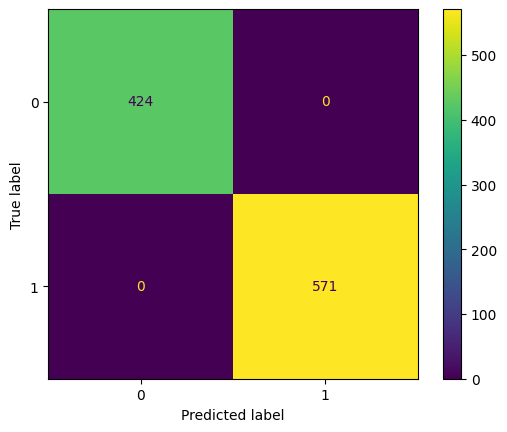

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       424
           1       1.00      1.00      1.00       571

    accuracy                           1.00       995
   macro avg       1.00      1.00      1.00       995
weighted avg       1.00      1.00      1.00       995



In [ ]:
# 라이브러리 불러오기
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# rfc 모델로 x_test를 예측한 값을 y_pred로 저장하기
y_pred = rfc.predict(x_test)

# 실제값 le_y_test(레이블 인코딩을 해야 0,1로 표현됨)와 예측값 y_pred 비교하기
cm = confusion_matrix(le_y_test, y_pred, labels=[0,1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()

# 오차행렬(Confusion Matrix) 출력하기
plt.show()

# 오차행렬(Confusion Matrix)를 통한 각종 지표들을 리포트로 출력하기
print(classification_report(le_y_test, y_pred))